In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, figure
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from IPython.display import display, Math, Markdown

# **Homogeneous Coordinates**

## Dot Product | Scalar Product

In [2]:
v = [2, 1, 3] 
u = [1, 1, 4] 

print(np.dot(v, u))

15


## Matrix Multiplication

In [3]:
A = [[1, 3], [2, 2]] 
B = [[4, 2], [1, -1]] 

print(np.dot(A, B))

[[ 7 -1]
 [10  2]]


## Reminder - Homogeneous Coordinates

In [4]:
# Conversion from Cartesian to homogeneous form
p_cart = [1, 2, 3]
w_1 = 1
p_homog_1 = [k * w_1 for k in p_cart]+[w_1]
w_2 = 2
p_homog_2 = [k * w_2 for k in p_cart]+[w_2]
print(p_homog_1, p_homog_2)

[1, 2, 3, 1] [2, 4, 6, 2]


In [5]:
# Conversion from homogeneous to Cartesian form
p_cart_1 = [k//p_homog_1[-1] for k in p_homog_1][:-1]
p_cart_2 = [k//p_homog_2[-1] for k in p_homog_2][:-1]
print(p_cart_1, p_cart_2)

[1, 2, 3] [1, 2, 3]


In [6]:
# Pinhole model (perspective projection) in homogeneous form
p_w_cart = [1, 2, 3]
f = 2
w = 1
p_w_homog = [k * w for k in p_w_cart]+[w]
pers_matrix = [[f, 0, 0, 0],[0, f, 0, 0],[0, 0, 1, 0]] # Projection on the virtual image plane
p_i_homog = np.dot(pers_matrix, p_w_homog)
p_i_cart = [k/p_i_homog[-1] for k in p_i_homog][:-1]
print("The world point in homogeneous form is: {}".format(p_w_homog))
print("The perspective projection matrix is: {}".format(pers_matrix))
print("The homogeneous coordinates of the point on the image are: {}".format(p_i_homog))
print("The Cartesian coordinates of the point on the image are: {}".format(p_i_cart))

The world point in homogeneous form is: [1, 2, 3, 1]
The perspective projection matrix is: [[2, 0, 0, 0], [0, 2, 0, 0], [0, 0, 1, 0]]
The homogeneous coordinates of the point on the image are: [2 4 3]
The Cartesian coordinates of the point on the image are: [0.6666666666666666, 1.3333333333333333]


# **Transformations**

In [7]:
# For practice, try generating the rotation matrix for the problem presented in the tutorial
yaw = 0
roll = 0
pitch = 0
Rz = np.array([])
Ry = np.array([])
Rx = np.array([])
R = np.dot(Rz, np.dot(Ry,Rx))
print(R)

[]


# **Camera Calibration**

## Step 1

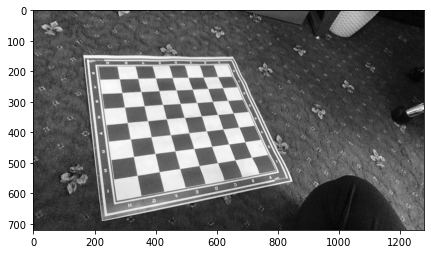

In [51]:
chess_img = cv2.imread('myChess/test/test1.jpeg', cv2.IMREAD_GRAYSCALE)

imshow(chess_img, cmap='gray', figure=figure(figsize=(7,7)))

In [52]:
# The pattern size is the number of inner corenrs in your chessboard (corners per row, corners per column).
# In this chessboard:
pattern_size=(7,7)

In [53]:
# The 'found' varibale is a boolean indicating if the corners were detected.
# The 'corners' varibale stores the found corners (a list of 2D points in the image).
found, corners = cv2.findChessboardCorners(chess_img, pattern_size)

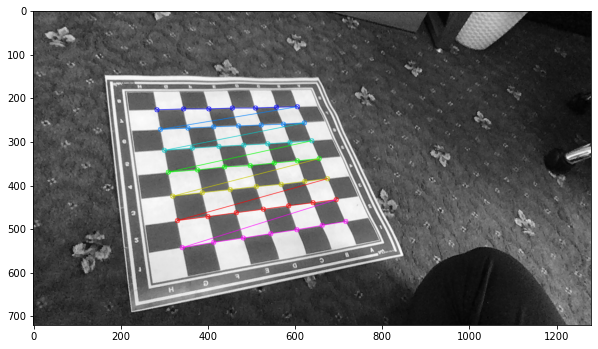

In [54]:
imshow(cv2.drawChessboardCorners(cv2.cvtColor(chess_img, cv2.COLOR_GRAY2RGB) ,
                                 pattern_size,
                                 corners,
                                 found),
       figure=figure(figsize=(10, 10)))

## Step 2

In [49]:
# Method 1:
from itertools import product
xs, ys = pattern_size
world_points = np.array([(x, y, 0)
                         for y, x in product(range(ys), range(xs))],
                        dtype=np.float32)
print(world_points)

[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0.  0.]
 [ 4.  0.  0.]
 [ 5.  0.  0.]
 [ 6.  0.  0.]
 [ 7.  0.  0.]
 [ 8.  0.  0.]
 [ 9.  0.  0.]
 [10.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  1.  0.]
 [ 2.  1.  0.]
 [ 3.  1.  0.]
 [ 4.  1.  0.]
 [ 5.  1.  0.]
 [ 6.  1.  0.]
 [ 7.  1.  0.]
 [ 8.  1.  0.]
 [ 9.  1.  0.]
 [10.  1.  0.]
 [ 0.  2.  0.]
 [ 1.  2.  0.]
 [ 2.  2.  0.]
 [ 3.  2.  0.]
 [ 4.  2.  0.]
 [ 5.  2.  0.]
 [ 6.  2.  0.]
 [ 7.  2.  0.]
 [ 8.  2.  0.]
 [ 9.  2.  0.]
 [10.  2.  0.]
 [ 0.  3.  0.]
 [ 1.  3.  0.]
 [ 2.  3.  0.]
 [ 3.  3.  0.]
 [ 4.  3.  0.]
 [ 5.  3.  0.]
 [ 6.  3.  0.]
 [ 7.  3.  0.]
 [ 8.  3.  0.]
 [ 9.  3.  0.]
 [10.  3.  0.]
 [ 0.  4.  0.]
 [ 1.  4.  0.]
 [ 2.  4.  0.]
 [ 3.  4.  0.]
 [ 4.  4.  0.]
 [ 5.  4.  0.]
 [ 6.  4.  0.]
 [ 7.  4.  0.]
 [ 8.  4.  0.]
 [ 9.  4.  0.]
 [10.  4.  0.]
 [ 0.  5.  0.]
 [ 1.  5.  0.]
 [ 2.  5.  0.]
 [ 3.  5.  0.]
 [ 4.  5.  0.]
 [ 5.  5.  0.]
 [ 6.  5.  0.]
 [ 7.  5.  0.]
 [ 8.  5.  0.]
 [ 9.  5.  0.]
 [10.  5.  0.]
 [ 0.  6. 

In [50]:
# Method 2
xs, ys = pattern_size
xx, yy = np.meshgrid(np.arange(xs),
                     np.arange(ys))
np.vstack([xx.flatten(),
           yy.flatten(),
           np.zeros(xs * ys)]).transpose()

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  0.],
       [ 5.,  0.,  0.],
       [ 6.,  0.,  0.],
       [ 7.,  0.,  0.],
       [ 8.,  0.,  0.],
       [ 9.,  0.,  0.],
       [10.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 2.,  1.,  0.],
       [ 3.,  1.,  0.],
       [ 4.,  1.,  0.],
       [ 5.,  1.,  0.],
       [ 6.,  1.,  0.],
       [ 7.,  1.,  0.],
       [ 8.,  1.,  0.],
       [ 9.,  1.,  0.],
       [10.,  1.,  0.],
       [ 0.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 2.,  2.,  0.],
       [ 3.,  2.,  0.],
       [ 4.,  2.,  0.],
       [ 5.,  2.,  0.],
       [ 6.,  2.,  0.],
       [ 7.,  2.,  0.],
       [ 8.,  2.,  0.],
       [ 9.,  2.,  0.],
       [10.,  2.,  0.],
       [ 0.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 2.,  3.,  0.],
       [ 3.,  3.,  0.],
       [ 4.,  3.,  0.],
       [ 5.,  3.,  0.],
       [ 6.,  3.,  0.],
       [ 7.,  3.,  0.],
       [ 8.,  3.

## Step 3 

In [51]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(
    objectPoints=[world_points],
    imagePoints=[corners],
    imageSize=chess_img.shape[::-1],
    cameraMatrix=None,
    distCoeffs=None)

print(cameraMatrix)

[[673.40399147   0.         305.00136488]
 [  0.         657.50782893 210.73706822]
 [  0.           0.           1.        ]]
